## Lab scenario
### As the Lead Data Scientist at Global EdTech Solutions, you are at the forefront of our strategic initiative to enhance the quality and relevance of our educational offerings. In alignment with our commitment to excellence and innovation, we have kicked off a project to harness the power of Generative AI and Transfer Learning to dissect and understand the wealth of feedback provided by our learners. Your expertise is crucial in steering this project towards actionable insights that will inform our course development and refinement strategies.

#### Import Libraries and Data
##### In this task, you are assigned to analyze customer feedback using sentiment analysis to understand their sentiments towards the company's services. Your main objectives include importing necessary libraries, loading customer feedback from a CSV file into a Pandas DataFrame, and inspecting the initial data.

In [1]:
# Import Pandas for data manipulation
import pandas as pd
# Import the pipeline function from the Transformers library for NLP tasks
from transformers import pipeline

In [2]:
# Load the customer feedback data from 'feedback.csv' into a DataFrame
df = pd.read_csv('feedback.csv')

In [3]:
df.head()

,Course Name,Timestamp,Rating,Comment
0,Econometrics and Statistics for Business in R ...,2020-03-06 23:13:43+00:00,5.0,"Fantastic course, from start to finish. Good p..."
1,Econometrics and Statistics for Business in R ...,2020-03-18 12:43:13+00:00,5.0,The course is really addressing real-world pro...
2,Econometrics and Statistics for Business in R ...,2020-03-18 21:11:52+00:00,5.0,Really good! I really enjoyed the new material!
3,Econometrics and Statistics for Business in R ...,2020-03-20 11:24:32+00:00,5.0,"Wonderful course, excellent instructor, easily..."
4,Econometrics and Statistics for Business in R ...,2020-03-21 09:51:44+00:00,5.0,Diogo is truly a remarkable teacher. The pace ...


#### Visualizing Course Ratings and Engagement with Matplotlib and Seaborn
##### This task focuses on visualizing course data to uncover insights into course ratings and student engagement. Using Python's Matplotlib and Seaborn libraries, you will create visual representations of the data contained within a DataFrame df. Your objectives are to:

##### Generate a histogram to analyze the overall distribution of course ratings.

##### Calculate the number of comments per course and visualize this data with a bar chart to assess student engagement.

##### Use Seaborn to create individual histograms for each course, allowing for a detailed comparison of rating distributions across courses.

##### Each visualization should be properly labeled and sized for clarity and aesthetic appeal.



In [4]:
# Import Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

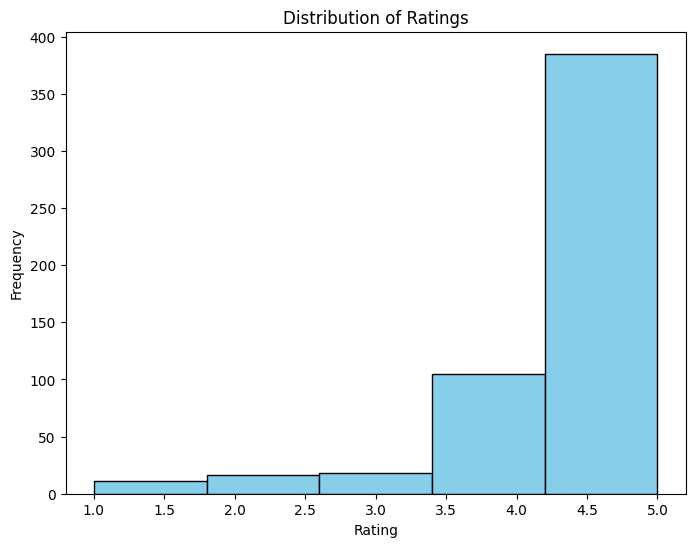

In [5]:
# Draw a histogram to visualize the distribution of course ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

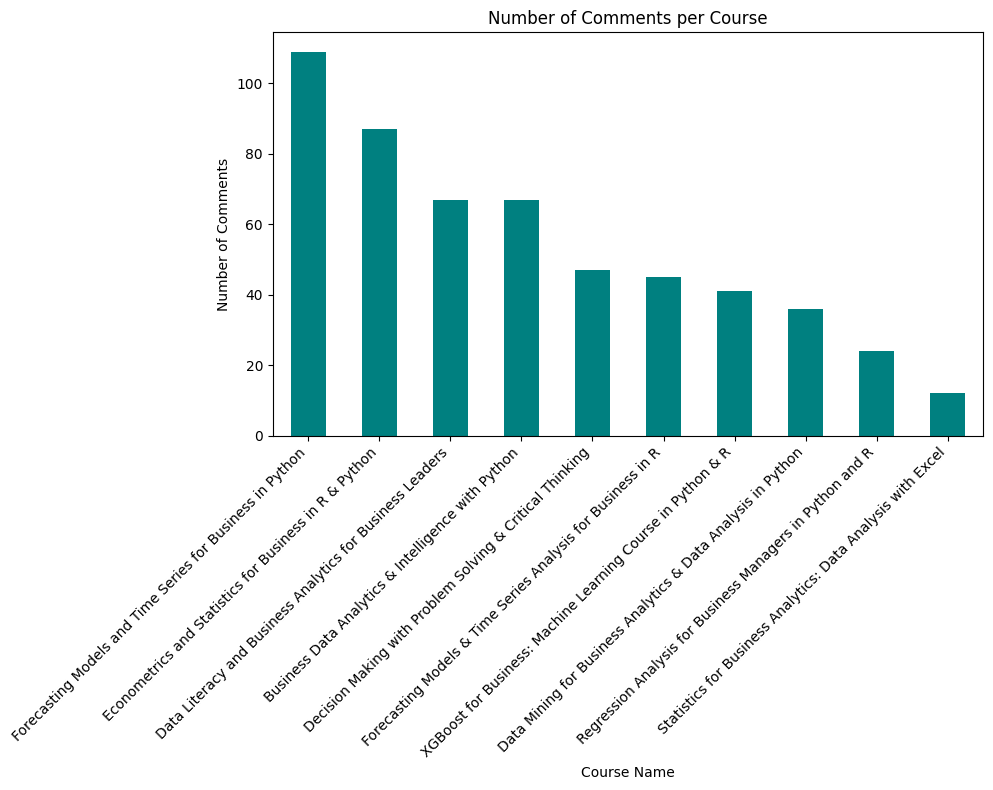

In [6]:
# Count comments per course and visualize with a bar chart
course_counts = df['Course Name'].value_counts()
plt.figure(figsize=(10, 8))
course_counts.plot(kind='bar', color='teal')
plt.title('Number of Comments per Course')
plt.xlabel('Course Name')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

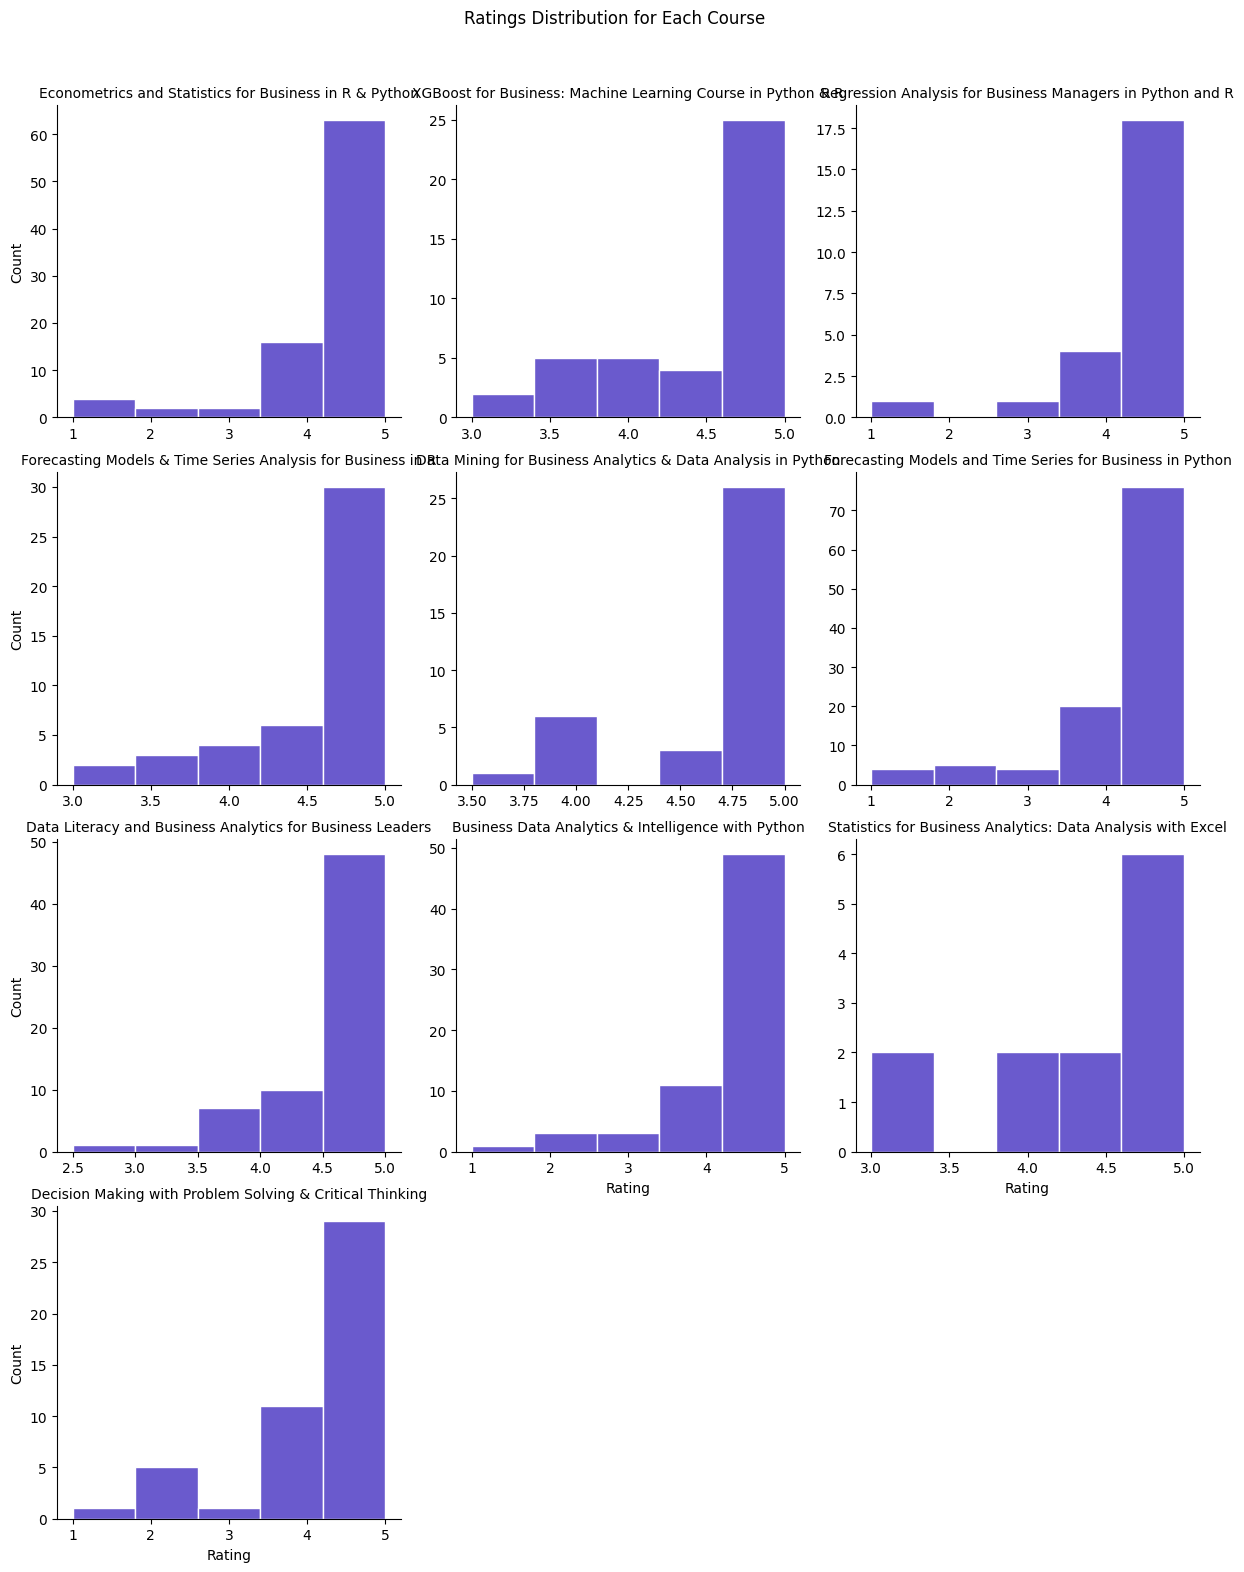

In [7]:
# Use Seaborn's FacetGrid for detailed histograms of ratings by course
g = sns.FacetGrid(df, col='Course Name', col_wrap=3, sharex=False, sharey=False, height=4)
g.map(plt.hist, 'Rating', bins=5, color='slateblue', edgecolor='white')
g.set_titles('{col_name}')
g.set_xlabels('Rating')
g.set_ylabels('Count')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Ratings Distribution for Each Course')
plt.show()

### Applying Advanced NLP Techniques for Sentiment and Theme Analysis
#### In this task, you will dive deeper into Natural Language Processing (NLP) by utilizing two advanced techniques: sentiment analysis and zero-shot classification. You will employ the Hugging Face Transformers library to leverage pre-trained models for these tasks. The goal is to analyze textual data to determine not only the sentiment (positive or negative) but also to categorize the text into predefined themes without explicit training on those themes. This involves:

##### Part 1: Sentiment Analysis - Using a pre-trained model (distilbert-base-uncased-finetuned-sst-2-english) specifically fine-tuned for sentiment analysis to evaluate text data and determine if the sentiment is positive or negative.

##### Part 2: Theme Extraction - Implementing zero-shot classification with another pre-trained model (typeform/distilbert-base-uncased-mnli) to categorize text data into themes such as "support", "practice", "explanations", or "unknown", without having been directly trained on these categories.

###### Please note that building the pipelines might throw errors, but you can ignore those

In [8]:
# Load the sentiment analysis pipeline with a pre-trained model
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

d:\PROJECTS\Personal Projects\personal_projects\personal_projects\.conda\Lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

### Implementing and Applying a Robust Sentiment Analysis Function
#### In this task, you will create and utilize a Python function named safe_sentiment_analysis to perform sentiment analysis on a dataset containing textual comments. The core of this task involves ensuring that the sentiment analysis is only applied to valid, non-empty strings to avoid errors and ensure meaningful output.

#### Part 1: Function Definition - You will define a function that checks if the input text is a valid string and non-empty before applying the sentiment analysis pipeline. If the text does not meet these criteria, the function will return a default sentiment value of "Unknown".

#### Part 2: Application on DataFrame - Utilize the defined function to apply sentiment analysis across a DataFrame column named Comment, storing the resulting sentiments in a new column.

#### Part 3: Analysis of Sentiment Distribution - After applying the sentiment analysis, you will aggregate and count the occurrences of each sentiment across different ratings to understand the sentiment distribution within the dataset.



In [9]:
# Load the zero-shot classification pipeline for theme extraction
theme_pipeline = pipeline("zero-shot-classification", model="typeform/distilbert-base-uncased-mnli")
# Specify the themes (classes) for classification
themes = ["support", "practice", "explanations", "unknown"]

config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/258 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


### Theme Extraction Using Zero-Shot Classification
#### In this task, you will focus on extracting themes from textual comments within a DataFrame using a robust function, extract_theme, which leverages a zero-shot classification model loaded into a variable named theme_pipeline.

#### Part 1: Function Definition - You will define the extract_theme function, which validates input text to ensure it's suitable for theme extraction and then applies the zero-shot classification pipeline to identify the most relevant theme.

#### Part 2: Application on DataFrame - You'll apply the extract_theme function across a column named Comment in a DataFrame df, storing the identified themes in a new column to facilitate further analysis.

#### Part 3: Data Inspection - After applying the theme extraction, you will perform a preliminary inspection of the DataFrame to review the results and ensure the themes have been successfully appended.

In [10]:
def safe_sentiment_analysis(text):
    # Ensure the text is a non-empty string
    if isinstance(text, str) and text.strip():
        return sentiment_pipeline(text)[0]['label']
    else:
        return "Unknown"  # Handle non-string or empty inputs

In [11]:
# Applying the safe sentiment analysis function to each comment
df['sentiment'] = df['Comment'].apply(lambda x: safe_sentiment_analysis(x))

### Analyzing Feedback by Sentiment and Theme Across Courses
#### This task involves advanced data analysis techniques to explore customer feedback across various courses, focusing on the interplay between sentiment, theme, and course engagement. You will:

#### Sentiment and Theme Occurrence Analysis - Calculate the occurrence of each theme by sentiment. This step involves grouping the data by 'theme' and 'sentiment', followed by counting the occurrences to understand the distribution of sentiments across different themes.

#### Visualizing Sentiment Distribution for Top Themes - Identify the top themes based on overall occurrence and visualize the distribution of sentiments within these themes. This visualization aims to highlight which themes are most prevalent and how sentiments are distributed within them.

#### Course-Specific Sentiment and Theme Analysis - Perform a granular analysis by grouping the feedback by 'Course Name', 'sentiment', and 'theme'. The goal is to count the number of comments for each combination and create a pivot table to display the counts of comments per sentiment and theme for each course, facilitating course-specific insights into feedback trends.

##### Conclude by indicating the themes and courses that require a granular deep dive to look into.



In [12]:
# Aggregate and count the occurrences of each sentiment across different ratings
sentiment_distribution = df[['Rating', 'sentiment']].value_counts()
print(sentiment_distribution)

Rating  sentiment
5.0     POSITIVE     305
4.0     POSITIVE      58
4.5     POSITIVE      58
3.5     POSITIVE      18
5.0     NEGATIVE      18
4.0     NEGATIVE      16
3.5     NEGATIVE      13
3.0     NEGATIVE      12
1.0     NEGATIVE      11
2.0     NEGATIVE       7
2.5     NEGATIVE       6
3.0     POSITIVE       5
2.5     POSITIVE       3
4.5     NEGATIVE       3
3.0     Unknown        1
5.0     Unknown        1
Name: count, dtype: int64


In [13]:
# Extract themes
def extract_theme(text):
    # Validate input text
    if isinstance(text, str) and text.strip():
        result = theme_pipeline(text, candidate_labels=themes)
        return result['labels'][0]  # Return the most likely theme
    else:
        return "Unknown"  # Handle invalid inputs

In [14]:
# Apply the extract_theme function to each comment in the DataFrame
df['theme'] = df['Comment'].apply(extract_theme)

In [15]:
# Display the first few rows of the DataFrame to inspect the theme extraction results
df.head()

,Course Name,Timestamp,Rating,Comment,sentiment,theme
0,Econometrics and Statistics for Business in R ...,2020-03-06 23:13:43+00:00,5.0,"Fantastic course, from start to finish. Good p...",POSITIVE,explanations
1,Econometrics and Statistics for Business in R ...,2020-03-18 12:43:13+00:00,5.0,The course is really addressing real-world pro...,POSITIVE,explanations
2,Econometrics and Statistics for Business in R ...,2020-03-18 21:11:52+00:00,5.0,Really good! I really enjoyed the new material!,POSITIVE,explanations
3,Econometrics and Statistics for Business in R ...,2020-03-20 11:24:32+00:00,5.0,"Wonderful course, excellent instructor, easily...",POSITIVE,practice
4,Econometrics and Statistics for Business in R ...,2020-03-21 09:51:44+00:00,5.0,Diogo is truly a remarkable teacher. The pace ...,POSITIVE,explanations


In [16]:
# Count the occurrence of each theme by sentiment
theme_sentiment_counts = df.groupby(['theme', 'sentiment']).size().unstack(fill_value=0)
theme_sentiment_counts

sentiment,NEGATIVE,POSITIVE,Unknown
theme,,,
Unknown,0,0,2
explanations,60,268,0
practice,7,84,0
support,6,91,0
unknown,13,4,0


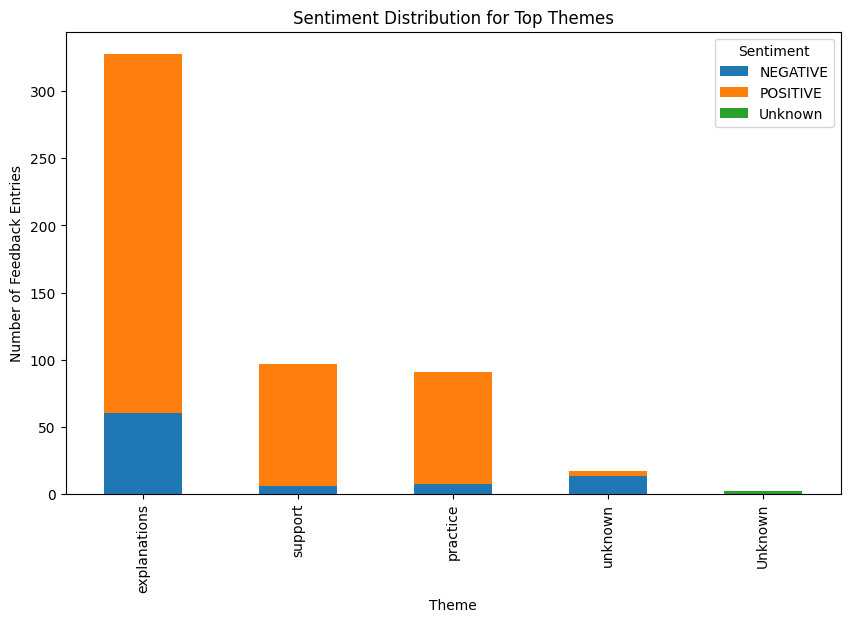

In [17]:
# Plot the distribution of sentiments for the top themes
top_themes = theme_sentiment_counts.sum(axis=1).nlargest(5).index
theme_sentiment_counts.loc[top_themes].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution for Top Themes')
plt.ylabel('Number of Feedback Entries')
plt.xlabel('Theme')
plt.legend(title='Sentiment')
plt.show()

In [18]:
# Group by 'Course Name', 'sentiment', and 'theme', and count the number of comments
grouped = df.groupby(['Course Name', 'sentiment', 'theme']).size().reset_index(name='counts')

# Pivot the table to have 'Course Name' as index, and a multi-level column for each 'sentiment'-'theme' combination
pivot_table = grouped.pivot_table(index='Course Name', columns=['sentiment', 'theme'], values='counts', fill_value=0)

# The pivot_table now contains the counts of comments per sentiment and theme for each course
pivot_table

sentiment                                              NEGATIVE           \
theme                                              explanations practice   
Course Name                                                                
Business Data Analytics & Intelligence with Python          9.0      0.0   
Data Literacy and Business Analytics for Busine...          6.0      2.0   
Data Mining for Business Analytics & Data Analy...          2.0      0.0   
Decision Making with Problem Solving & Critical...          5.0      1.0   
Econometrics and Statistics for Business in R &...          9.0      1.0   
Forecasting Models & Time Series Analysis for B...          5.0      1.0   
Forecasting Models and Time Series for Business...         10.0      2.0   
Regression Analysis for Business Managers in Py...          4.0      0.0   
Statistics for Business Analytics: Data Analysi...          1.0      0.0   
XGBoost for Business: Machine Learning Course i...          9.0      0.0   

sentiment                                                           \
theme                                              support unknown   
Course Name                                                          
Business Data Analytics & Intelligence with Python     2.0     2.0   
Data Literacy and Business Analytics for Busine...     1.0     0.0   
Data Mining for Business Analytics & Data Analy...     0.0     0.0   
Decision Making with Problem Solving & Critical...     0.0     0.0   
Econometrics and Statistics for Business in R &...     1.0     4.0   
Forecasting Models & Time Series Analysis for B...     0.0     1.0   
Forecasting Models and Time Series for Business...     2.0     4.0   
Regression Analysis for Business Managers in Py...     0.0     1.0   
Statistics for Business Analytics: Data Analysi...     0.0     1.0   
XGBoost for Business: Machine Learning Course i...     0.0     0.0   

sentiment                                              POSITIVE           \
theme                                              explanations practice   
Course Name                                                                
Business Data Analytics & Intelligence with Python         31.0     12.0   
Data Literacy and Business Analytics for Busine...         35.0     11.0   
Data Mining for Business Analytics & Data Analy...         23.0      4.0   
Decision Making with Problem Solving & Critical...         11.0     18.0   
Econometrics and Statistics for Business in R &...         51.0     11.0   
Forecasting Models & Time Series Analysis for B...         27.0      5.0   
Forecasting Models and Time Series for Business...         51.0     15.0   
Regression Analysis for Business Managers in Py...         14.0      2.0   
Statistics for Business Analytics: Data Analysi...          5.0      2.0   
XGBoost for Business: Machine Learning Course i...         20.0      4.0   

sentiment                                                          Unknown  
theme                                              support unknown Unknown  
Course Name                                                                 
Business Data Analytics & Intelligence with Python    11.0     0.0     0.0  
Data Literacy and Business Analytics for Busine...    11.0     0.0     1.0  
Data Mining for Business Analytics & Data Analy...     6.0     1.0     0.0  
Decision Making with Problem Solving & Critical...    12.0     0.0     0.0  
Econometrics and Statistics for Business in R &...     8.0     2.0     0.0  
Forecasting Models & Time Series Analysis for B...     6.0     0.0     0.0  
Forecasting Models and Time Series for Business...    24.0     1.0     0.0  
Regression Analysis for Business Managers in Py...     3.0     0.0     0.0  
Statistics for Business Analytics: Data Analysi...     2.0     0.0     1.0  
XGBoost for Business: Machine Learning Course i...     8.0     0.0     0.0